In [ ]:
import folium
import pandas as pd
from folium.plugins import HeatMap
import psycopg2
import matplotlib.pyplot as plot

conn_details = psycopg2.connect(
   host="data-sandbox.c1tykfvfhpit.eu-west-2.rds.amazonaws.com",
   database="pagila",
   user="de8_mira43",
   password="LMplx56)",
   port= '5432'
)

content_query = ''' SELECT * FROM student.mrrd_air_uk
                    WHERE (date) = current_date
                '''
cursor = conn_details.cursor()
cursor.execute(content_query)
current = cursor.fetchall()

current_df = pd.DataFrame(current, columns = ['air_id','station_name','date','time','country','lat','lon', 'aqi'])

In [ ]:

heatmap_df = current_df[['lat', 'lon', 'aqi']]
center = [54.813348,-4.196777]
max_aqi = int(current_df['aqi'].max())
map_uk = folium.Map(location = center, zoom_start = 5)
map_info = HeatMap(heatmap_df, min_opacity = 0.1, max_val = max_aqi,radius = 20, blur = 20, max_zoom = 2)
map_uk.add_child(map_info)
map_uk


<ipython-input-7-d3a42b2649c9>:5: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  map_info = HeatMap(heatmap_df, min_opacity = 0.1, max_val = max_aqi,radius = 20, blur = 20, max_zoom = 2)


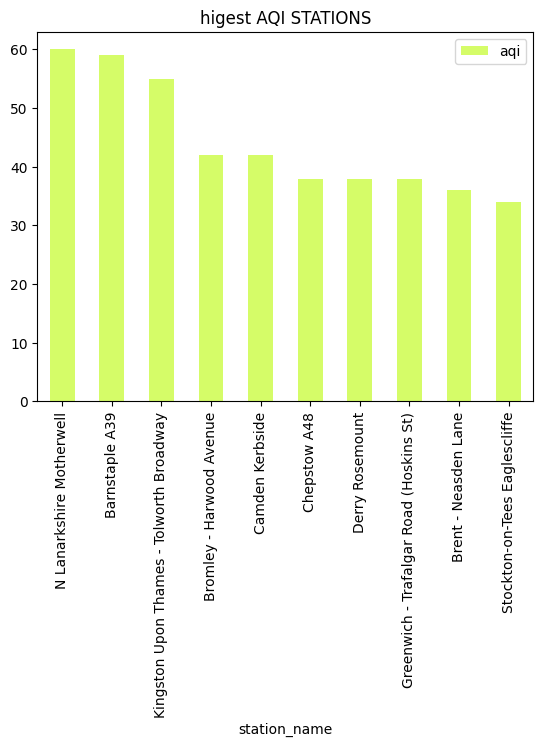

In [ ]:

test = current_df.sort_values('aqi', ascending=False)
top_10 = test.head(10)
top_10.head(10)

top_10.plot.bar(x="station_name", y="aqi", title="higest AQI STATIONS",color = '#d5fc68');

plot.show(block=True)